In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import axis as ax
from gsw import SA_from_SP, CT_from_t, rho, p_from_z, spiciness0
%matplotlib inline

In [2]:
pwd

'/Users/alaimo/Documents/Rutgers/RoadToPhD/Chapter 2'

In [3]:
## Load in DEP Data from 1988-2022
df = pd.read_csv('/Users/alaimo/Documents/Rutgers/NJDEPTrawl/Data/TowsCatchTable.csv')

In [4]:
## Load in DEP Midwater Data from 2011-2022
midwater = pd.read_csv('/Users/alaimo/Documents/Rutgers/NJDEPTrawl/Data/MidwaterTempSalDO2011-2022.csv')

In [5]:
## Changing the column names to match the trawl data format
midwater = midwater.rename(columns = {"Temp" :"TEMPMID", "SALINITY":"SALMID", "ODOConc":"DOMID"})
midwater = midwater.drop(columns=['DepthType'])
midwater = midwater.set_index("ID")
midwater

,TEMPMID,SALMID,DOMID
ID,,,
20111001,2.022111,30.767778,11.342000
20111002,2.751868,30.990000,11.304396
20111003,1.662295,28.795738,12.296230
20111004,1.114211,26.250526,13.407895
20111005,2.651605,30.221111,11.434938
...,...,...,...
20225147,16.833083,33.452361,6.324722
20225148,17.004447,33.606000,7.319647
20225149,16.447950,33.485333,7.800000


In [7]:
## adding in the midwater data to the merged set
dep_full = pd.merge(df,midwater,on="ID", how='left').sort_index()

In [8]:
dep_full

,ID,CRUCODE,STA,STRATUM,TOW,YRMODA,TIME,MINOUT,STARTDEPTH,ENDDEPTH,...,SALSURF,SALBOT,DOSURF,DOBOT,SPP,WEIGHT,NUMBER,TEMPMID,SALMID,DOMID
0,19882006,19882,6,12,25,19880821,705,22.2,9.0000,9.0000,...,31.000000,31.50000,7.400000,3.30000,131,73.88,7786.0,NaN,NaN,NaN
1,19882006,19882,6,12,25,19880821,705,22.2,9.0000,9.0000,...,31.000000,31.50000,7.400000,3.30000,35,0.15,1.0,NaN,NaN,NaN
2,19882006,19882,6,12,25,19880821,705,22.2,9.0000,9.0000,...,31.000000,31.50000,7.400000,3.30000,301,5.50,18.0,NaN,NaN,NaN
3,19882006,19882,6,12,25,19880821,705,22.2,9.0000,9.0000,...,31.000000,31.50000,7.400000,3.30000,31,0.08,4.0,NaN,NaN,NaN
4,19882006,19882,6,12,25,19880821,705,22.2,9.0000,9.0000,...,31.000000,31.50000,7.400000,3.30000,72,0.60,8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136355,20244148,20244,148,12,20,20240827,1510,16.0,10.3632,9.7536,...,28.515978,30.84039,10.498043,3.66478,317,0.58,3.0,NaN,NaN,NaN
136356,20244148,20244,148,12,20,20240827,1510,16.0,10.3632,9.7536,...,28.515978,30.84039,10.498043,3.66478,322,0.06,1.0,NaN,NaN,NaN
136357,20244148,20244,148,12,20,20240827,1510,16.0,10.3632,9.7536,...,28.515978,30.84039,10.498043,3.66478,332,0.06,1.0,NaN,NaN,NaN
136358,20244148,20244,148,12,20,20240827,1510,16.0,10.3632,9.7536,...,28.515978,30.84039,10.498043,3.66478,652,0.50,2.0,NaN,NaN,NaN


In [9]:
## Creating year and cruise columns
dep_full['year'] = dep_full['CRUCODE'].astype(str).str[:4].astype(int)
dep_full['cruise'] = dep_full['CRUCODE'].astype(str).str[4:5].astype(int)

In [10]:
# Dropping years 1988-2008 to match NEAMAP  
drops = np.arange(1988,2008)
df2 = dep_full.set_index('year')
df2 = df2.drop(drops)

In [11]:
## Reseting the index to be the trawl ID number 
dep_full=df2.reset_index().set_index("ID").sort_index()

In [12]:
dep_full['YRMODA'] = pd.to_datetime(dep_full['YRMODA'], format='%Y%m%d')

In [13]:
dep_full["DOY"] = dep_full["DOY"] = pd.to_datetime(dep_full['YRMODA'], format='%Y%m%d').dt.dayofyear

In [14]:
dep_full['month'] = dep_full["YRMODA"].astype(str).str[5:7].astype(int)

In [15]:
dep_full['tempdiff']= dep_full.TEMPSURF - dep_full.TEMPBOT # adding top-bottom temperature difference column 

In [16]:
dep_full['dt'] = dep_full.tempdiff/dep_full.STARTDEPTH

In [17]:
dep_full['lat']=(dep_full['SLAT'].astype(str).str[:2].astype(float))
dep_full['latmin']=((dep_full['SLAT'].astype(str).str[2:8].astype(float))/60)
dep_full["SLAT"]=dep_full.lat+dep_full.latmin

In [18]:
dep_full['SLONG']=dep_full['SLONG'].fillna("00").astype(float)

In [19]:
dep_full['lon']=dep_full['SLONG'].astype(str).str[:2].astype(float)
dep_full['lonmin']=((dep_full['SLONG'].astype(str).str[2:8].astype(float))/60)
dep_full['SLONG']=-(dep_full.lon+dep_full.lonmin)

In [20]:
dep_full['ELAT']=dep_full['ELAT'].fillna("00").astype(float)

In [21]:
dep_full['lat']=(dep_full['ELAT'].astype(str).str[:2].astype(float))
dep_full['latmin']=((dep_full['ELAT'].astype(str).str[2:8].astype(float))/60)
dep_full["ELAT"]=dep_full.lat+dep_full.latmin

In [22]:
dep_full['ELONG']=dep_full['ELONG'].fillna("00").astype(float)

In [23]:
dep_full['lon']=dep_full['ELONG'].astype(str).str[:2].astype(float)
dep_full['lonmin']=((dep_full['ELONG'].astype(str).str[2:8].astype(float))/60)
dep_full['ELONG']=-(dep_full.lon+dep_full.lonmin)

In [24]:
def density(temperature, depth, salinity, latitude, longitude):
    """
    Calculates density given practical salinity, depth, latitude,
    and longitude using Gibbs gsw SA_from_SP and rho functions.
    Args:
        temperature (_type_): temperature (C)
        depth (_type_): depth, positive up (m)
        salinity (array): salinity
        latitude (array): latitude (decimal degrees)
        longitude (array): longitude (decimal degrees)
    Returns:
        density: Density calculated using the Gibbs GSW
    """
    # Calculates sea pressure from height using computationally-efficient
    # 75-term expression for density, in terms of SA, CT and p
    # (Roquet et al., 2015).
    pressure = p_from_z(
        depth,
        latitude,
    )
    # Calculates Absolute Salinity from Practical Salinity.
    # Since SP is non-negative by definition,
    # this function changes any negative input values of SP to be zero.
    absolute_salinity = SA_from_SP(
        salinity,
        pressure,
        longitude,
        latitude
    )
    # Calculates Conservative Temperature of seawater from in-situ temperature.
    conservative_temperature = CT_from_t(
        absolute_salinity,
        temperature,
        pressure
    )
    # Calculates in-situ density from Absolute Salinity and
    # Conservative Temperature, using the computationally-efficient expression
    # for specific volume in terms of SA, CT and p (Roquet et al., 2015).
    density = rho(
        absolute_salinity,
        conservative_temperature,
        pressure
    )
    return density

In [25]:
dep_full['denssurf'] = density(dep_full.TEMPSURF,-dep_full.STARTDEPTH, dep_full.SALSURF,dep_full.SLAT,dep_full.SLONG)

In [26]:
dep_full['densmid'] = density(dep_full.TEMPMID,-(dep_full.STARTDEPTH/2), dep_full.SALMID,dep_full.SLAT,dep_full.SLONG)

In [27]:
dep_full['densbot'] = density(dep_full.TEMPBOT,-dep_full.STARTDEPTH, dep_full.SALBOT,dep_full.SLAT,dep_full.SLONG)

In [28]:
dep_full = dep_full.reset_index()
dep_full= dep_full.set_index("ID").sort_index()

dep_full.loc[(dep_full['STRATUM'].isin([12, 15, 18, 21, 24])), 'location'] = "Inshore"
dep_full.loc[(dep_full['STRATUM'].isin([13, 16, 19, 22, 25])), 'location'] = "Midshore"
dep_full.loc[(dep_full['STRATUM'].isin([14, 17, 20, 23, 26])), 'location'] = "Offshore"

In [29]:
dep_full["n_s"] = np.where(dep_full.STRATUM <= 17,"North","South")

In [30]:
dep_full["decade"] = np.where(dep_full['year'] < 2000, 1990,
                        np.where((dep_full['year'] >= 2000) & (dep_full['year'] < 2010), 2000,
                                 np.where(dep_full['year'] >= 2010, 2010, 0)))

In [31]:
#Making a separate dataframe with just the oceanographic data

dep_full2 = dep_full.drop(columns=["WEIGHT","SPP","NUMBER",'lat','latmin','lon','lonmin'])
dep_full2 = dep_full2.reset_index()
dep_full2 = dep_full2.drop_duplicates("ID")

dep_full2 = dep_full2.reset_index()
dep_full2 = dep_full2.set_index("ID")
dep_full2.sort_index()

,index,year,CRUCODE,STA,STRATUM,TOW,YRMODA,TIME,MINOUT,STARTDEPTH,...,DOY,month,tempdiff,dt,denssurf,densmid,densbot,location,n_s,decade
ID,,,,,,,,,,,,,,,,,,,,,
20081001,0,2008,20081,1,13,15,2008-01-19,735,20.0,17.0000,...,19,1,-1.200000,-0.070588,1023.369871,NaN,1024.953452,Midshore,North,2000
20081002,21,2008,20081,2,12,26,2008-01-19,841,18.0,11.0000,...,19,1,-1.700000,-0.154545,1022.585905,NaN,1024.820034,Inshore,North,2000
20081003,45,2008,20081,3,13,8,2008-01-19,1023,20.0,20.0000,...,19,1,-1.900000,-0.095000,1021.049474,NaN,1024.991427,Midshore,North,2000
20081004,68,2008,20081,4,12,9,2008-01-19,1140,20.0,8.0000,...,19,1,-2.700000,-0.337500,1019.166029,NaN,1022.929848,Inshore,North,2000
20081005,90,2008,20081,5,14,6,2008-01-19,1249,20.0,22.0000,...,19,1,-2.000000,-0.090909,1021.285194,NaN,1025.208217,Offshore,North,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20244144,59113,2024,20244,144,13,10,2024-08-27,906,20.0,17.6784,...,240,8,9.669105,0.546945,1021.110575,NaN,1024.342851,Midshore,North,2010
20244145,59137,2024,20244,145,13,8,2024-08-27,1031,20.0,16.1544,...,240,8,8.884375,0.549966,1020.888161,NaN,1024.028694,Midshore,North,2010
20244146,59158,2024,20244,146,14,1,2024-08-27,1148,20.0,17.9832,...,240,8,9.870153,0.548854,1018.408723,NaN,1024.274436,Offshore,North,2010


In [32]:
#Making a dataframe with just the fisheries data

squid = dep_full.groupby("SPP").get_group(503)
squid = squid.rename(columns = {"WEIGHT" :"squid_weight", "NUMBER":"squid"})

squid = squid.reset_index()

squid= squid.set_index("ID").sort_index()

squid = squid.drop(columns=["CRUCODE", "STA", "STRATUM", "TOW", "YRMODA", "TIME", "MINOUT","STARTDEPTH","ENDDEPTH","MINDEPTH","MAXDEPTH","SLAT","SLONG","ELAT","ELONG","TEMPSURF",'TEMPMID',"TEMPBOT","SALSURF","SALMID","SALBOT","DOSURF","DOMID","DOBOT","SPP",'cruise','year','lat','latmin','lon','lonmin','tempdiff','dt','densbot','densmid','denssurf','location','n_s',"decade","month","DOY"])

squid['squid1'] = np.where(squid['squid'] >= 1.0,1,0).astype(int)

squid = pd.DataFrame(squid)
squid

,squid_weight,squid,squid1
ID,,,
20081015,0.57,8.0,1
20081016,0.14,2.0,1
20081018,0.39,4.0,1
20081019,0.30,8.0,1
20081028,0.10,1.0,1
...,...,...,...
20244143,10.99,2439.0,1
20244144,7.58,1245.0,1
20244145,4.54,1348.0,1


In [33]:
## Adding the squid data to the full dataset
combo4 = pd.merge(dep_full2,squid,on="ID", how='left').sort_index()

In [34]:
combo4.update(combo4[[ "squid", "squid_weight", "squid1"]].fillna(0))

In [41]:
combo4

,index,year,CRUCODE,STA,STRATUM,TOW,YRMODA,TIME,MINOUT,STARTDEPTH,...,dt,denssurf,densmid,densbot,location,n_s,decade,squid_weight,squid,squid1
ID,,,,,,,,,,,,,,,,,,,,,
20081001,0,2008,20081,1,13,15,2008-01-19,735,20.0,17.0000,...,-0.070588,1023.369871,NaN,1024.953452,Midshore,North,2000,0.00,0.0,0.0
20081002,21,2008,20081,2,12,26,2008-01-19,841,18.0,11.0000,...,-0.154545,1022.585905,NaN,1024.820034,Inshore,North,2000,0.00,0.0,0.0
20081003,45,2008,20081,3,13,8,2008-01-19,1023,20.0,20.0000,...,-0.095000,1021.049474,NaN,1024.991427,Midshore,North,2000,0.00,0.0,0.0
20081004,68,2008,20081,4,12,9,2008-01-19,1140,20.0,8.0000,...,-0.337500,1019.166029,NaN,1022.929848,Inshore,North,2000,0.00,0.0,0.0
20081005,90,2008,20081,5,14,6,2008-01-19,1249,20.0,22.0000,...,-0.090909,1021.285194,NaN,1025.208217,Offshore,North,2000,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20244144,59113,2024,20244,144,13,10,2024-08-27,906,20.0,17.6784,...,0.546945,1021.110575,NaN,1024.342851,Midshore,North,2010,7.58,1245.0,1.0
20244145,59137,2024,20244,145,13,8,2024-08-27,1031,20.0,16.1544,...,0.549966,1020.888161,NaN,1024.028694,Midshore,North,2010,4.54,1348.0,1.0
20244146,59158,2024,20244,146,14,1,2024-08-27,1148,20.0,17.9832,...,0.548854,1018.408723,NaN,1024.274436,Offshore,North,2010,3.20,432.0,1.0


In [45]:
selected_groups = [2,3]
dfs_to_concat = [combo4.groupby('cruise').get_group(name) for name in selected_groups]
njdep_spring = pd.concat(dfs_to_concat)
njdep_spring.year

ID
20082031    2008
20082032    2008
20082033    2008
20082034    2008
20082035    2008
            ... 
20243105    2024
20243106    2024
20243107    2024
20243108    2024
20243109    2024
Name: year, Length: 1192, dtype: int64

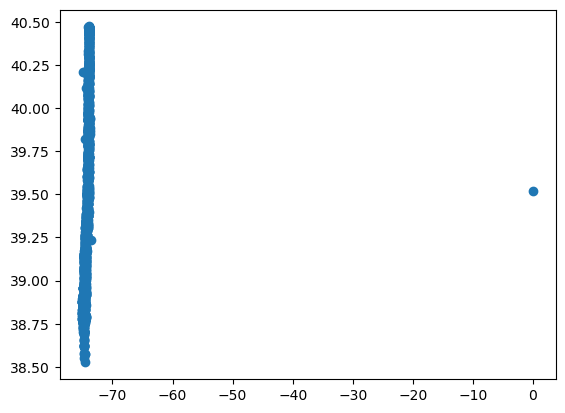

In [36]:
plt.scatter(njdep_spring.SLONG,njdep_spring.SLAT)

In [37]:
# Removing 5 Outlier Points for Lat/Lon

#1 
njdep_spring = njdep_spring.drop(njdep_spring[(njdep_spring['SLONG'] < -74.8) &(njdep_spring['SLONG'] > -74.9) & (njdep_spring['SLAT'] < 40.25)& (njdep_spring['SLAT'] > 40.1)].index)
#2
njdep_spring = njdep_spring.drop(njdep_spring[(njdep_spring['SLONG'] > -10)].index)
#3
njdep_spring = njdep_spring.drop(njdep_spring[(njdep_spring['SLONG'] < -74.3) &(njdep_spring['SLONG'] > -74.4) & (njdep_spring['SLAT'] < 40.2)& (njdep_spring['SLAT'] > 40.05)].index)
#4
njdep_spring = njdep_spring.drop(njdep_spring[(njdep_spring['SLONG'] < -74.5) &(njdep_spring['SLONG'] > -74.6) & (njdep_spring['SLAT'] < 39.9)& (njdep_spring['SLAT'] > 39.75)].index)
#5
njdep_spring = njdep_spring.drop(njdep_spring[(njdep_spring['SLONG'] > -73.6)].index)

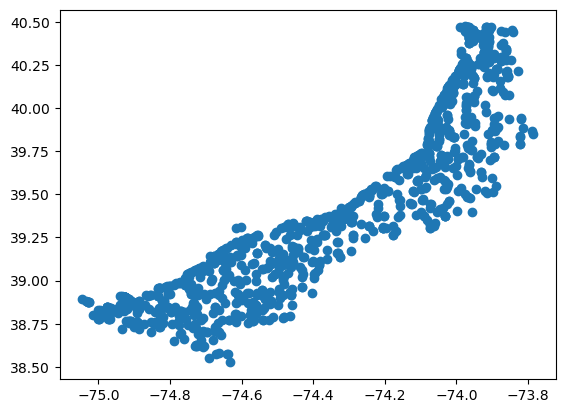

In [38]:
plt.scatter(njdep_spring['SLONG'],njdep_spring['SLAT'])

In [39]:
njdep_spring

,index,year,CRUCODE,STA,STRATUM,TOW,YRMODA,TIME,MINOUT,STARTDEPTH,...,dt,denssurf,densmid,densbot,location,n_s,decade,squid_weight,squid,squid1
ID,,,,,,,,,,,,,,,,,,,,,
20082031,526,2008,20082,31,13,15,2008-04-17,742,20.0,18.000,...,0.144444,1020.514120,NaN,1024.944909,Midshore,North,2000,0.00,0.0,0.0
20082032,551,2008,20082,32,12,21,2008-04-17,901,13.0,12.000,...,0.125000,1018.682197,NaN,1024.366540,Inshore,North,2000,0.00,0.0,0.0
20082033,581,2008,20082,33,12,7,2008-04-17,1038,20.0,9.000,...,0.333333,1015.713531,NaN,1024.562393,Inshore,North,2000,0.00,0.0,0.0
20082034,603,2008,20082,34,13,1,2008-04-17,1148,20.0,20.000,...,0.170000,1014.882181,NaN,1024.560464,Midshore,North,2000,0.00,0.0,0.0
20082035,627,2008,20082,35,14,10,2008-04-17,1325,20.0,23.000,...,0.121739,1023.081820,NaN,1024.588167,Offshore,North,2000,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20243105,58060,2024,20243,105,12,24,2024-06-03,825,20.0,10.980,...,0.376920,1021.721932,NaN,1023.310167,Inshore,North,2010,0.68,19.0,1.0
20243106,58096,2024,20243,106,14,14,2024-06-03,1029,20.0,23.180,...,0.429141,1020.318059,NaN,1024.063004,Offshore,North,2010,4.34,367.0,1.0
20243107,58121,2024,20243,107,14,4,2024-06-03,1151,15.0,21.960,...,0.480908,1019.419159,NaN,1024.173928,Offshore,North,2010,3.14,202.0,1.0


In [40]:
njdep_spring.to_csv("Data/njdep_spring.csv")